In [1]:
import sys
import os

# Add the scripts/ folder to the Python path
sys.path.append(os.path.abspath("scripts"))

In [12]:
import joblib
from scripts.split_data import load_split_data
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    accuracy_score,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.save_utils import save_fig

In [5]:
model_path = "models/svm_pipeline_20250408_190616.joblib"
svm_model = joblib.load(model_path)

In [4]:
DATA_PATH = "data/raw/Bank Customer Churn Prediction.csv"
_, X_test, _, y_test = load_split_data(DATA_PATH)

In [6]:
#Predict class labels
y_pred = svm_model.predict(X_test)

#Predict probabilities for ROC/PR curves
y_prob = svm_model.predict_proba(X_test)[:, 1]

#### Classification Report

In [7]:
report = classification_report(y_test, y_pred, target_names=["Not Churned", "Churned"])
print(report)

              precision    recall  f1-score   support

 Not Churned       0.86      0.98      0.92      1593
     Churned       0.85      0.38      0.53       407

    accuracy                           0.86      2000
   macro avg       0.86      0.68      0.72      2000
weighted avg       0.86      0.86      0.84      2000



#### Confusion Matrix

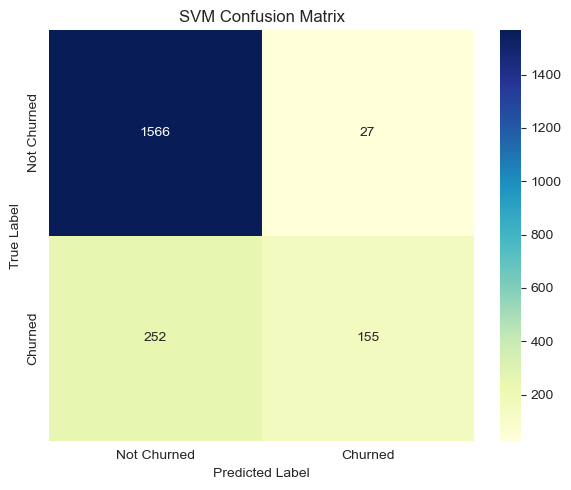

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Not Churned", "Churned"],
            yticklabels=["Not Churned", "Churned"])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
save_fig("eval-svm-confusion-matrix", "evaluation")
plt.show()

#### ROC - AUC 

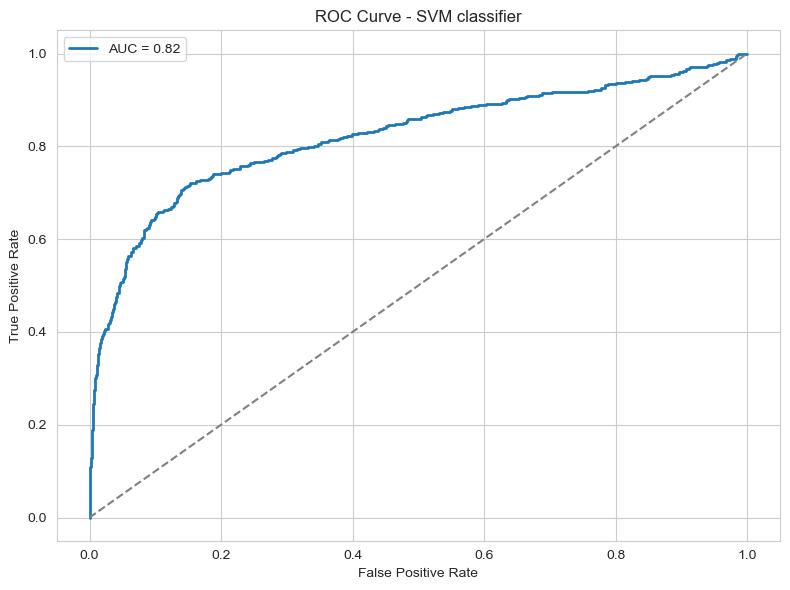

In [15]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color="#1f77b4", linewidth=2)
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM classifier")
plt.legend()
plt.tight_layout()
save_fig("eval-svm-roc-auc", "evaluation")
plt.show()

#### Precision - Recall Curve

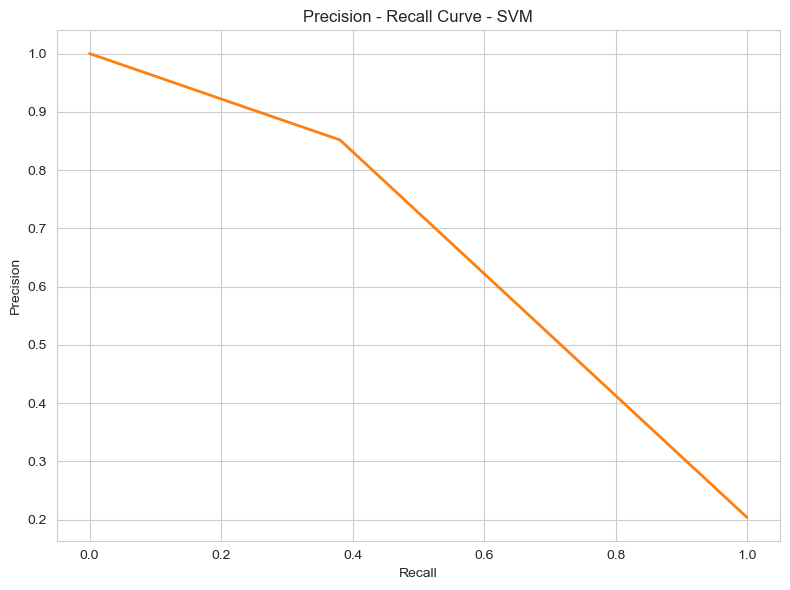

In [16]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="#ff7f0e", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision - Recall Curve - SVM")
plt.grid(True)
plt.tight_layout()
save_fig("eval-svm-precision-recall-curve", "evaluation")
plt.show()

## Support Vector Machine (SVM) - Model Evaluation Summary

###  Cross-Validation Performance (Train Set)
- **Mean Accuracy**: 85.60%
- **Mean F1 Score**: 52.34%
- **Mean ROC AUC Score**: 68.20%

---

###  Test Set Performance
- **Accuracy**: 86%
- **Precision (Churned)**: 85%
- **Recall (Churned)**: **38%**
- **F1 Score (Churned)**: 53%
- **ROC AUC Score**: 82%

---



###  Observations
-  The model performs very well in identifying non-churned customers.
-  However, it **struggles with recall** on the churned class (only 38%), which means it's missing many actual churners.
-  Precision is quite high for churned class, suggesting that when the model predicts churn, it's usually correct.
-  The relatively lower recall may be due to SVM's tendency to **optimize margin globally**, which can favor the majority class (non-churners) in imbalanced datasets.